In [23]:
from pygeoinf.interval.interval_domain import IntervalDomain
import numpy as np
# Use the integration_profiler module (keeps notebook thin)
from integration_profiler import run_profiling, plot_measurement_vs_parameter


In [24]:
def f(x):
    return np.sin(x) * np.exp(-x**2) + (np.sin(10*x))**2

domain = IntervalDomain(0, 1)

In [25]:
# Integration parameters
integration_parameters = {
    'method': ['simpson', 'trapz'],
    'n_points': np.logspace(1, 6, 20, dtype=int),
    'vectorized': True,
}

# Profiling parameters
repeats = 5

# Run profiling (this will save CSV/pickle files and return df, summary)
df, summary = run_profiling(domain, f, integration_parameters, repeats=repeats, save_prefix='integration_profile')

print('Profiling finished — data saved to integration_profile_flat.csv and integration_profile_summary.csv')

Profiling finished — data saved to integration_profile_flat.csv and integration_profile_summary.csv


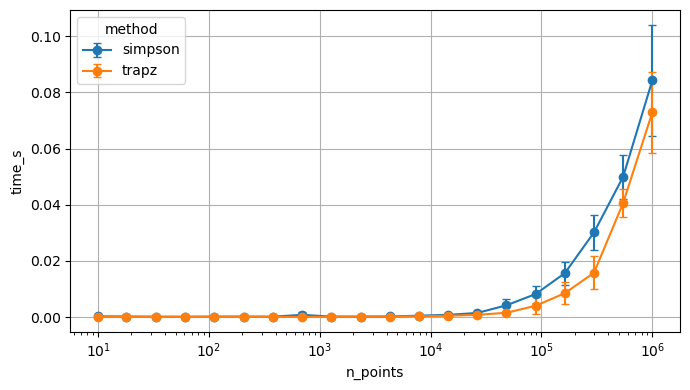

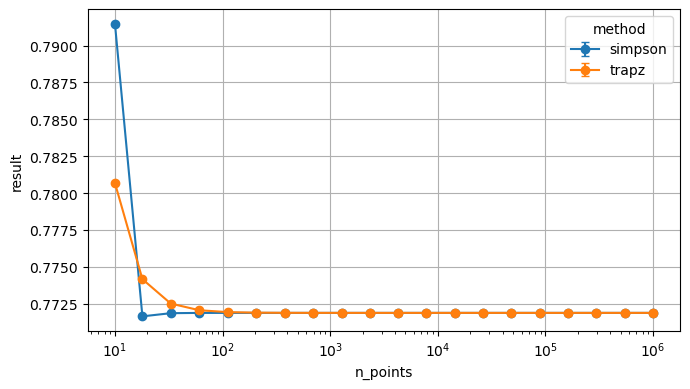

In [27]:
# Usage examples for plot_measurement_vs_parameter
# 1) Line plot: time vs n_points grouped by method (log x)
g1 = plot_measurement_vs_parameter(df, 'time_s', 'n_points', by='method', kind='line', log_x=True)

g2 = plot_measurement_vs_parameter(df, 'result', 'n_points', by='method', kind='line', log_x=True)